# Wine Dataset

### Importing Packages

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

### Loading Dataset

In [2]:
rawfile = r'E:\\Programming languages\\Machine Learning\\Data Gathering & Processing\\01_wine_dataset\\wine.data'
dataset = pd.read_csv(rawfile)
df = pd.read_csv(rawfile)
df.head()

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


### Assigning Columns

In [3]:
columns_list = [
    'class',
    'Alcohol',
    'Malic acid',
    'Ash',
    'Alcalinity of ash',
    'Magnesium',
    'Total phenols',
    'Flavanoids',
    'Nonflavanoid phenols',
    'Proanthocyanins',
    'Color intensity',
    'Hue',
    'OD280/OD315 of diluted wines',
    'Proline'
]
df.columns = columns_list

### Splitting into Features and labels

In [7]:
df_features = df.drop('class',axis=1)
df_label = df[['class']]

### Information about DataFrame

In [8]:
df_features_info = df_features.info()
df_label_info = df_label.info()
print(df_features_info)
print(df_label_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Alcohol                       177 non-null    float64
 1   Malic acid                    177 non-null    float64
 2   Ash                           177 non-null    float64
 3   Alcalinity of ash             177 non-null    float64
 4   Magnesium                     177 non-null    int64  
 5   Total phenols                 177 non-null    float64
 6   Flavanoids                    177 non-null    float64
 7   Nonflavanoid phenols          177 non-null    float64
 8   Proanthocyanins               177 non-null    float64
 9   Color intensity               177 non-null    float64
 10  Hue                           177 non-null    float64
 11  OD280/OD315 of diluted wines  177 non-null    float64
 12  Proline                       177 non-null    int64  
dtypes: fl

### Checking for N-Unique values of labels

In [10]:
df_label_nunique = df_label.nunique()
df_label_value_counts = df_label.value_counts()
print(df_label_nunique)
print(df_label_value_counts)

class    3
dtype: int64
class
2        71
1        58
3        48
dtype: int64


### Checking for correlation between Features and label

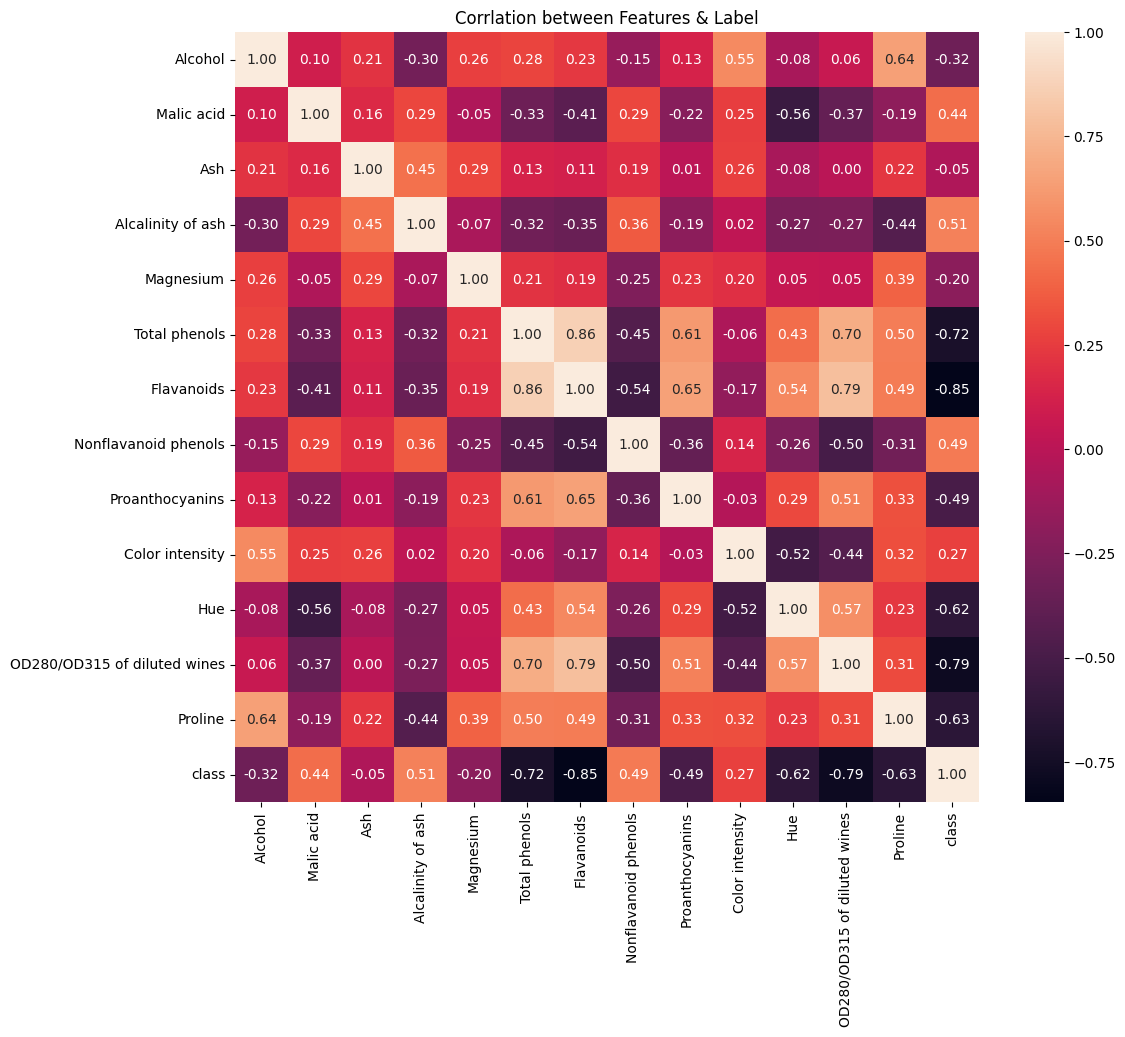

In [14]:
plt.figure(figsize=(12, 10))
df_correlations = pd.concat([df_features,df_label],axis=1).corr()
df_correlation_Plot = sns.heatmap(data=df_correlations,annot=True,fmt=".2f")
plt.title("Corrlation between Features & Label")
plt.show()

### Checking for outliers

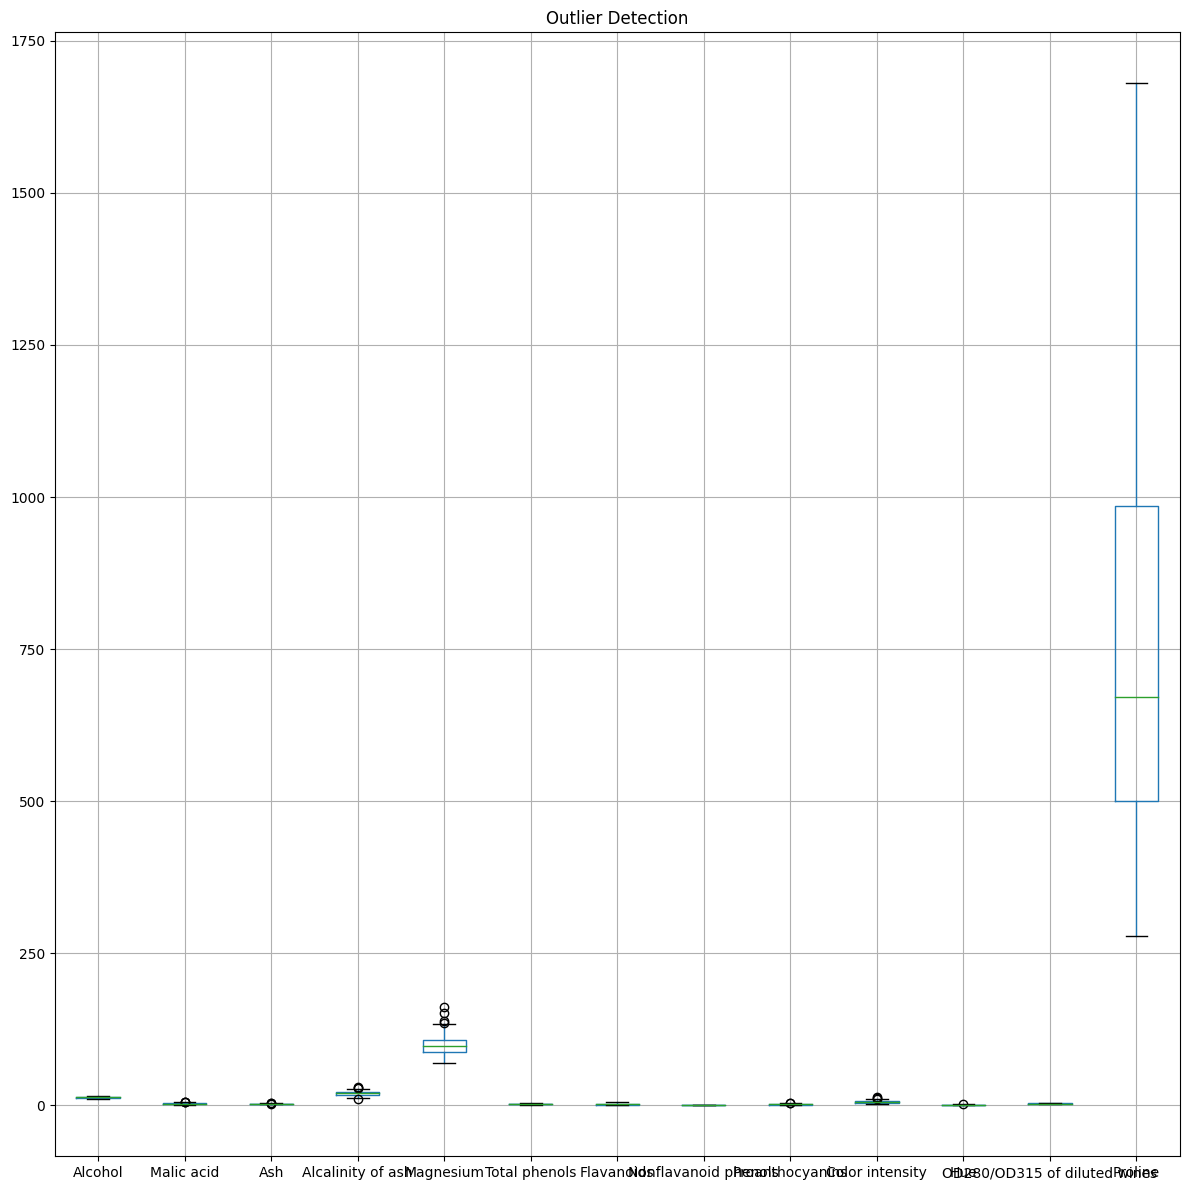

In [30]:
plt.figure(figsize=(12,12))
df_features.boxplot()
plt.title("Outlier Detection")
plt.tight_layout()
plt.show()

### Removing Outliers

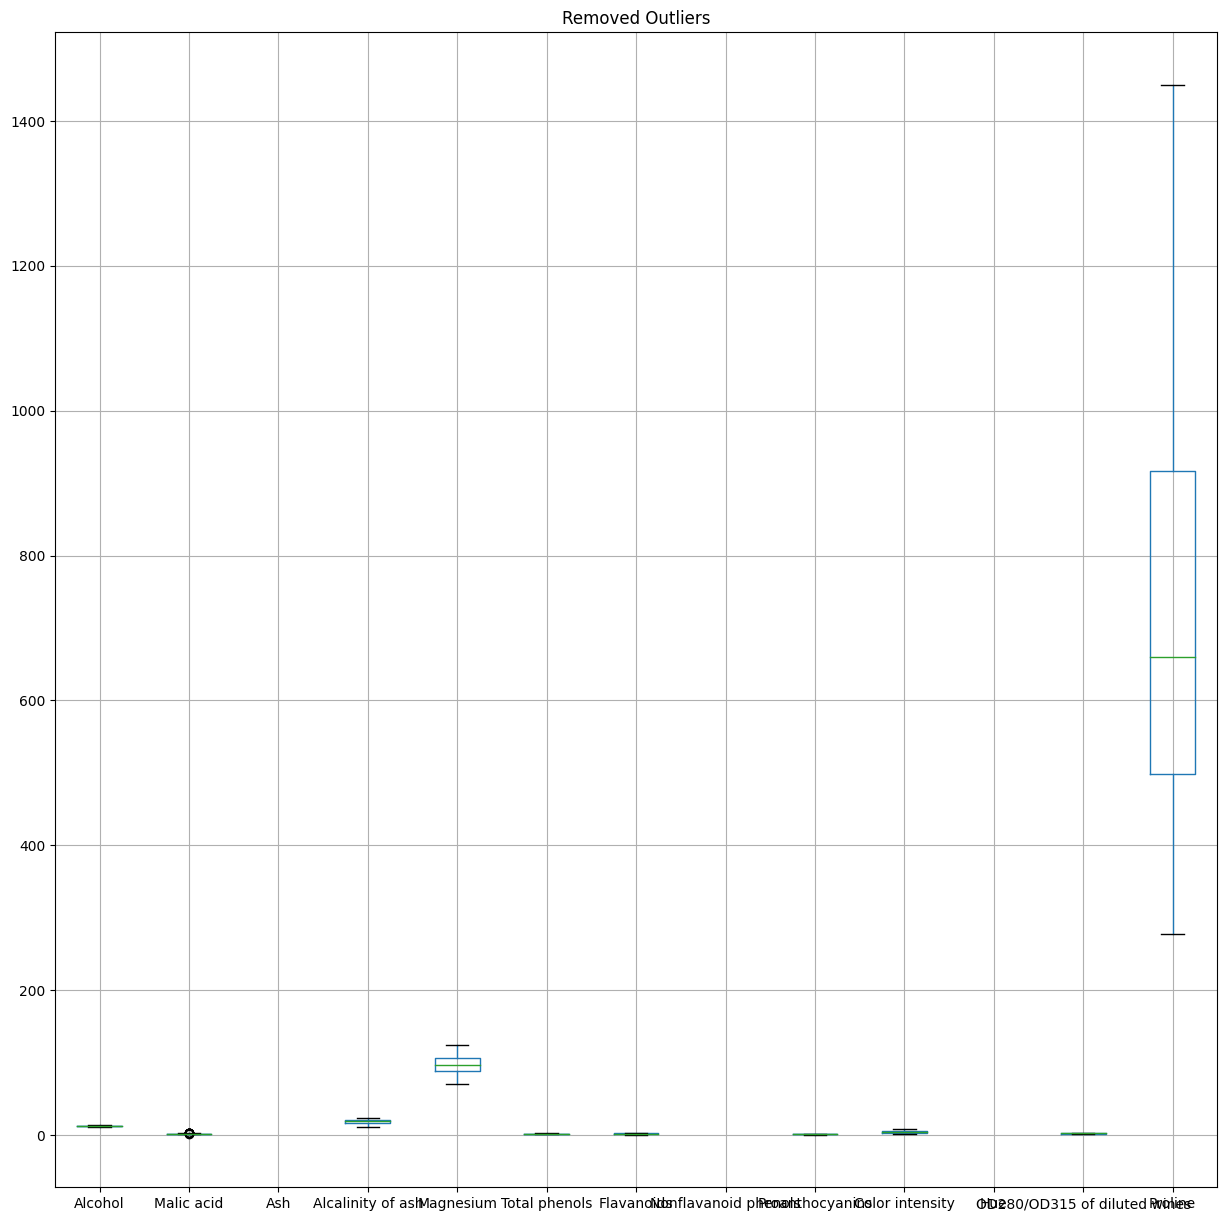

In [31]:
Q1 = df_features.quantile(0.25)
Q3 = df_features.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - IQR * 1.5
upper_bound = Q3 + IQR - 1.5
df_feature_no_outliers = df_features[(df_features >= lower_bound) & (df_features <= upper_bound)]

# Checking for outliers after removing them
plt.figure(figsize=(15,15))
df_feature_no_outliers.boxplot()
plt.title("Removed Outliers")
plt.show()

### Normalization of Data

In [37]:
minMax_scaler = MinMaxScaler()
df_features_scaled = minMax_scaler.fit_transform(df_feature_no_outliers)
df_features_scaled = pd.DataFrame(df_features_scaled,columns=df_features.columns)
print(df_features_scaled.head())

    Alcohol  Malic acid  Ash  Alcalinity of ash  Magnesium  Total phenols  \
0  0.885714    0.454148  NaN           0.000000   0.555556            NaN   
1  0.869388    0.707424  NaN           0.578125   0.574074            NaN   
2       NaN    0.528384  NaN           0.437500   0.796296            NaN   
3  0.902041    0.807860  NaN           0.765625   0.888889            NaN   
4       NaN    0.445415  NaN           0.312500   0.777778            NaN   

   Flavanoids  Nonflavanoid phenols  Proanthocyanins  Color intensity  Hue  \
0    0.909774                   NaN              NaN         0.486656  NaN   
1         NaN                   NaN              NaN         0.690738  NaN   
2         NaN                   NaN              NaN              NaN  NaN   
3    0.883459                   NaN              NaN         0.477237  NaN   
4         NaN                   NaN              NaN         0.858713  NaN   

   OD280/OD315 of diluted wines   Proline  
0                       

c:\Users\Dhrumil Patel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_data.py:464: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
c:\Users\Dhrumil Patel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_data.py:465: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


`Note: Other EDA process could be implemented, as per the dataset required data preprocessing has done. 
Explore more: www.github/itechdp`